<a href="https://colab.research.google.com/github/katyk20/distance-education-highered/blob/main/Notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ! git clone https://github.com/katyk20/distance-education-highered.git

Cloning into 'DistanceLearning_Capstone'...
remote: Enumerating objects: 735, done.
remote: Counting objects: 100% (377/377), done.
remote: Compressing objects: 100% (183/183), done.
remote: Total 735 (delta 253), reused 298 (delta 194), pack-reused 358
Receiving objects: 100% (735/735), 79.04 MiB | 15.65 MiB/s, done.
Resolving deltas: 100% (369/369), done.


In [ ]:
# %cd /content/distance-education-highered.git
# !git pull

/content/DistanceLearning_Capstone
Already up to date.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

In [ ]:
#read in depprograms18_22
dep=pd.read_csv('/content/drive/MyDrive/Capstone_Winter2024/PROJECT DATASETS/dist_enrollment18_22.csv')

In [ ]:
dep.columns

Index(['UNITID', 'INSTNM', 'YEAR', 'IALIAS', 'STABBR', 'OBEREG', 'ICLEVEL',
       'CONTROL', 'DEGGRANT', 'LONGITUD', 'LATITUDE', 'EFDELEV', 'EFDETOT',
       'EFDEEXC', 'EFDESOM', 'EFDENON', 'EFDEEX1', 'EFDEEX2', 'EFDEEX3',
       'EFDEEX4', 'EFDEEX5 ', 'YEAR.1'],
      dtype='object')

In [ ]:
dep2= dep[dep['EFDELEV'] == 1]
dep2

,UNITID,INSTNM,YEAR,IALIAS,STABBR,OBEREG,ICLEVEL,CONTROL,DEGGRANT,LONGITUD,...,EFDETOT,EFDEEXC,EFDESOM,EFDENON,EFDEEX1,EFDEEX2,EFDEEX3,EFDEEX4,EFDEEX5,YEAR.1
0,100654,Alabama A & M University,2018,AAMU,AL,5,1,1,1,-86.568502,...,6106,120.0,1089.0,4897.0,87.0,16.0,17.0,0.0,0.0,2018
5,100663,University of Alabama at Birmingham,2018,,AL,5,1,1,1,-86.799345,...,21923,5603.0,6935.0,9385.0,3915.0,1674.0,0.0,7.0,7.0,2018
10,100690,Amridge University,2018,Southern Christian University |Regions University,AL,5,1,2,1,-86.174010,...,755,755.0,0.0,0.0,441.0,253.0,0.0,0.0,61.0,2018
14,100706,University of Alabama in Huntsville,2018,UAH |University of Alabama Huntsville,AL,5,1,1,1,-86.640449,...,9736,638.0,2044.0,7054.0,428.0,210.0,0.0,0.0,0.0,2018
19,100724,Alabama State University,2018,,AL,5,1,1,1,-86.295677,...,4413,437.0,296.0,3680.0,316.0,110.0,11.0,0.0,0.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111781,498465,National Tractor Trailer School,2022,,AZ,6,3,3,2,-112.223438,...,136,0.0,0.0,136.0,NaN,NaN,NaN,NaN,NaN,2022
111784,498483,Galen Health Institutes-Pikeville,2022,,KY,5,2,3,1,-82.530209,...,26,0.0,26.0,0.0,NaN,NaN,NaN,NaN,NaN,2022
111787,498553,Stellar Career College,2022,,IL,3,3,3,2,-87.634151,...,141,0.0,141.0,0.0,NaN,NaN,NaN,NaN,NaN,2022
111790,498562,Commonwealth University of Pennsylvania,2022,,PA,2,1,1,1,-76.447844,...,12074,1579.0,6100.0,4395.0,1428.0,147.0,1.0,3.0,0.0,2022


In [ ]:
#Institutions by year, total distance education enrollment, name
relevant_data = dep[['YEAR', 'INSTNM', 'EFDETOT']]
relevant_data=relevant_data.dropna()
# Grouping by year and institution, summing the 'exdettot' values
grouped_data = relevant_data.groupby(['YEAR', 'INSTNM']).sum().reset_index()
# Sorting grouped data by year and exdettot within each year
grouped_data.sort_values(by=['YEAR', 'EFDETOT'], ascending = False, inplace=True)



In [ ]:
grouped_data

,YEAR,INSTNM,EFDETOT
28869,2022,Southern New Hampshire University,469047
29980,2022,Western Governors University,426677
26340,2022,Grand Canyon University,270401
26715,2022,Ivy Tech Community College,269115
29676,2022,University of Phoenix-Arizona,247648
...,...,...,...
139,2018,Alliance Computing Solutions,6
244,2018,Anson College of Cosmetology,4
5746,2018,University of Phoenix-Maryland,3
1348,2018,Community Technology Learning Center of Portage,2


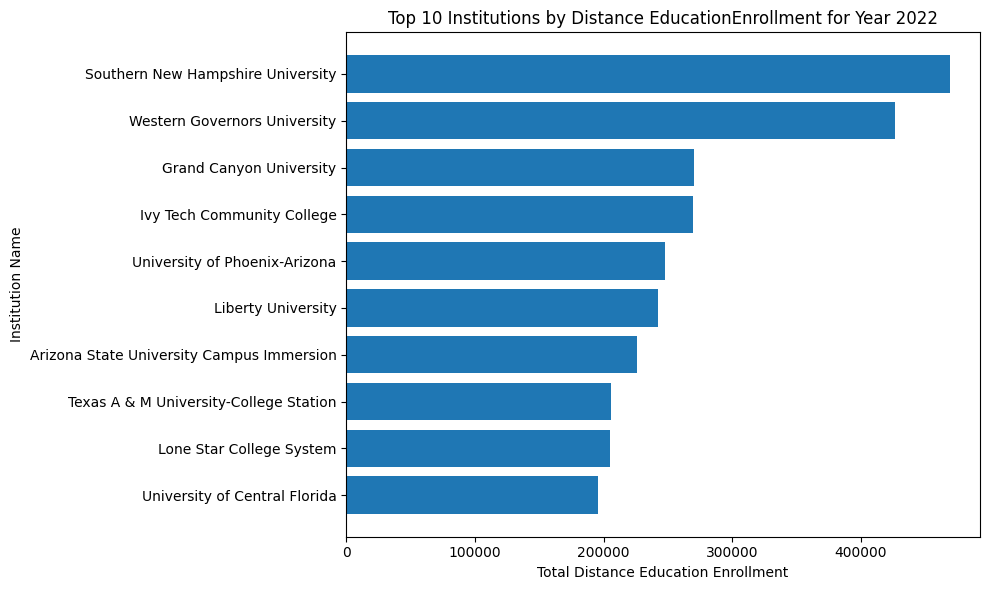

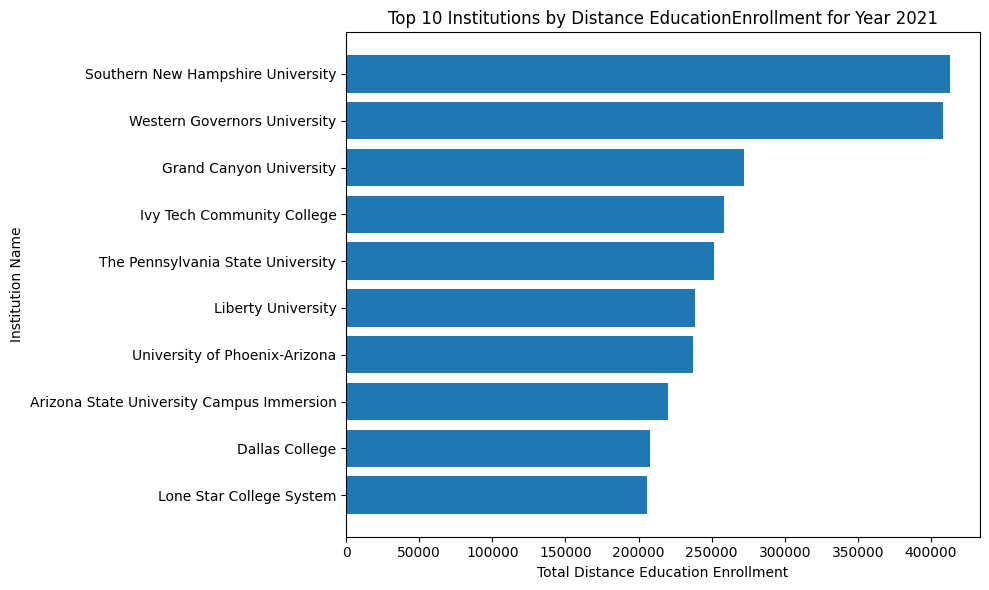

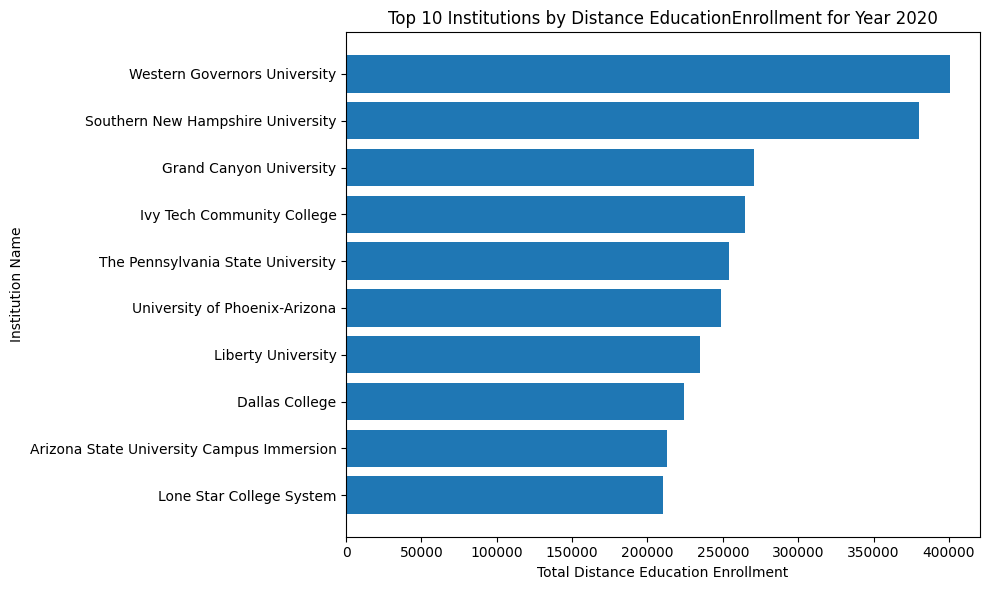

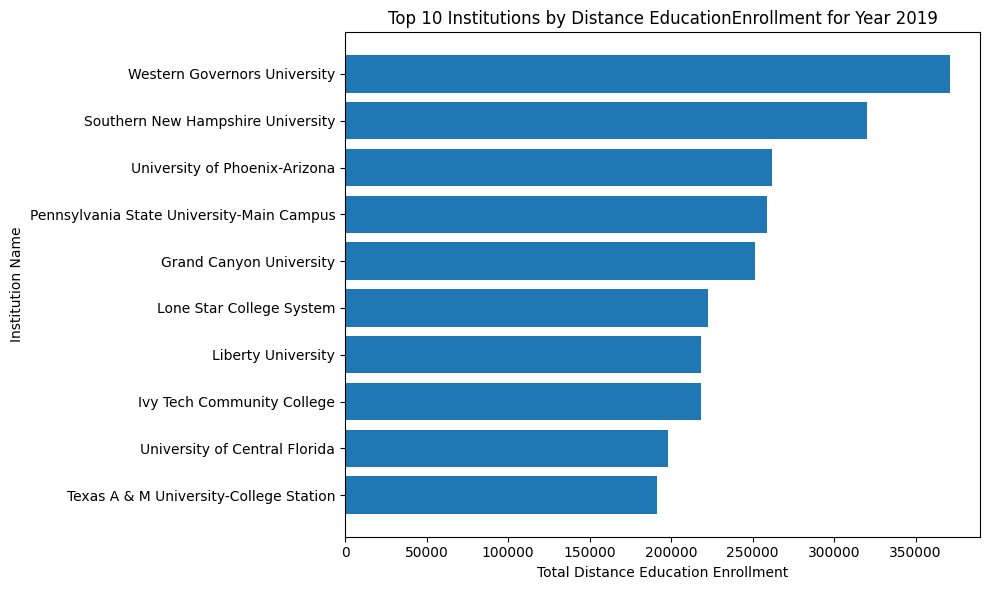

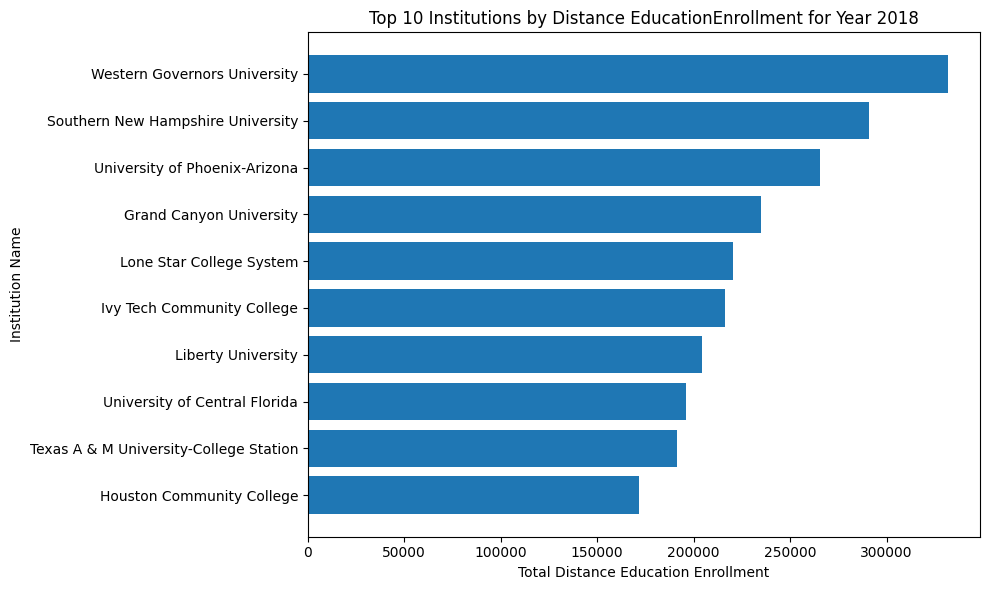

In [ ]:
#Plotting top 10 institutions by enrollment for each year
years = grouped_data['YEAR'].unique()

for year in years:
    top_10 = grouped_data[grouped_data['YEAR'] == year].head(10)
    plt.figure(figsize=(10, 6))
    plt.barh(top_10['INSTNM'], top_10['EFDETOT'])
    plt.xlabel('Total Distance Education Enrollment')
    plt.ylabel('Institution Name')
    plt.title(f'Top 10 Institutions by Distance EducationEnrollment for Year {year}')
    plt.gca().invert_yaxis()  # Invert y-axis to display top institutions at the top
    plt.tight_layout()
    plt.show()

In [ ]:
dep.columns

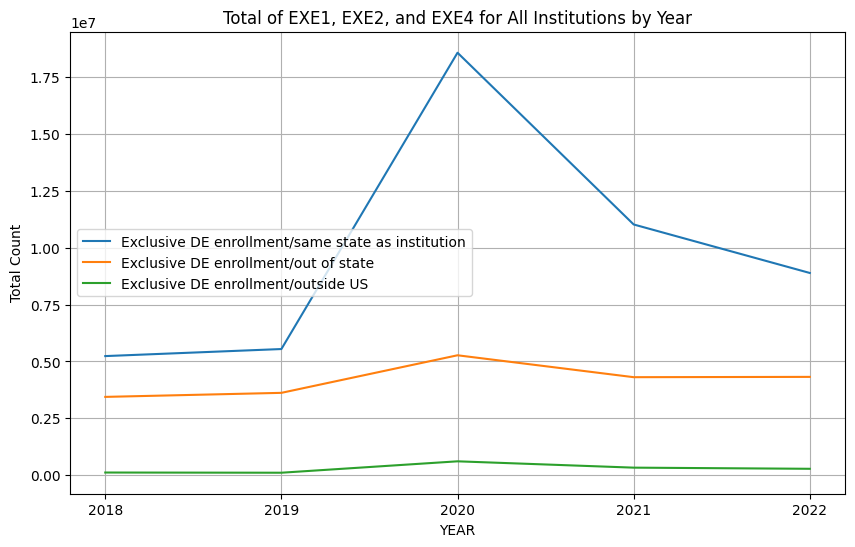

In [ ]:
# Filter relevant columns and drop rows with missing values
# Convert 'Year' column to integer
dep['Year'] = dep['YEAR'].round().astype(int)
# dep['Year']
stu_located = dep[['YEAR', 'EFDEEX1', 'EFDEEX2', 'EFDEEX4']].dropna()

# # Convert 'Year' column to integer
# stu_located['Year'] = stu_located['Year'].astype(int)

# Grouping by year and summing the 'EXE1', 'EXE2', 'EXE4' values
grouped_data = stu_located.groupby('YEAR').sum().reset_index()

# Plotting the totals of EXE1, EXE2, and EXE4 for each year
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['YEAR'], grouped_data['EFDEEX1'], label='Exclusive DE enrollment/same state as institution')
plt.plot(grouped_data['YEAR'], grouped_data['EFDEEX2'], label='Exclusive DE enrollment/out of state')
plt.plot(grouped_data['YEAR'], grouped_data['EFDEEX4'], label='Exclusive DE enrollment/outside US')

plt.xlabel('YEAR')
plt.ylabel('Total Count')
plt.title('Total of EXE1, EXE2, and EXE4 for All Institutions by Year')
plt.legend()
plt.grid(True)
plt.xticks([2018, 2019, 2020, 2021,2022])
plt.show()

In [ ]:
stu_located.columns

Index(['YEAR', 'EFDEEX1', 'EFDEEX2', 'EFDEEX4'], dtype='object')

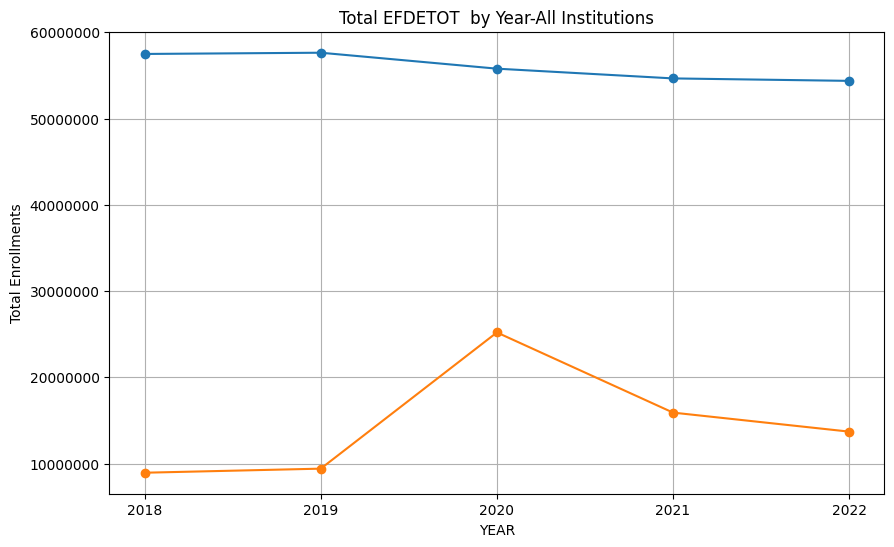

In [ ]:

# Convert 'Year' column to integer
dep['Year'] = dep['YEAR'].round().astype(int)

year_trend = dep[['YEAR', 'EFDETOT', 'EFDEEXC']].dropna()

# Grouping by year and summing the 'EFDETOTAL' and EFDEEXC values
grouped_data = year_trend.groupby('YEAR').sum().reset_index()

# Plotting the total EFDETOTAL by year
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['YEAR'], grouped_data['EFDETOT' ], marker='o', linestyle='-', label='EFDETOT')
plt.plot(grouped_data['YEAR'], grouped_data['EFDEEXC'], marker='o', linestyle='-', label='EFDEEXC')

plt.xlabel('YEAR')
plt.ylabel('Total Enrollments')
plt.title('Total EFDETOT  by Year-All Institutions')
plt.xticks([2018, 2019, 2020, 2021, 2022])
# Set y-axis tick formatter to display numbers without exponent
# plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.grid(True)
plt.show()

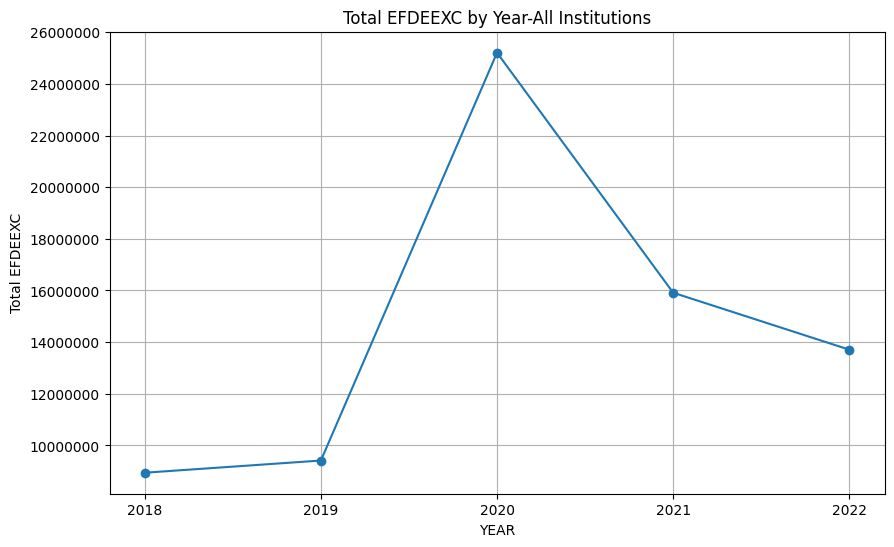

In [ ]:

# Convert 'Year' column to integer
dep['YEAR'] = dep['YEAR'].round().astype(int)

year_trend = dep[['YEAR', 'EFDEEXC']].dropna()

# Grouping by year and summing the 'EFDETOTAL' and EFDEEXC values
grouped_data = year_trend.groupby('YEAR').sum().reset_index()

# Plotting the total EFDETOTAL by year
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['YEAR'], grouped_data['EFDEEXC' ], marker='o', linestyle='-')

plt.xlabel('YEAR')
plt.ylabel('Total EFDEEXC')
plt.title('Total EFDEEXC by Year-All Institutions')
plt.xticks([2018, 2019, 2020, 2021, 2022])
# Set y-axis tick formatter to display numbers without exponent
# plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.grid(True)
plt.show()